In [1]:

import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/Othercomputers/My Laptop/Brax Test/MicroRaptor")

In [3]:
!ls

BraxTest.ipynb	      custom_envs  test_file_1.html  Train.py
convert_bolt_urdf.py  README.md    test_file_2.html


In [4]:
from datetime import datetime
import functools
import os

from IPython.display import HTML, clear_output

!pip install jax==0.2.21
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
  import brax
except ImportError:
  !pip install brax==0.0.6
  clear_output()
  import brax

import custom_envs
from brax.training import ppo, sac
from brax.io import html as html

if 'COLAB_TPU_ADDR' in os.environ:
  from jax.tools import colab_tpu
  colab_tpu.setup_tpu()

In [5]:
env_fn = custom_envs.create_fn(env_name="bolt")
env = env_fn()
jit_env_reset = jax.jit(env.reset)
state = jit_env_reset(rng=jax.random.PRNGKey(seed=0))

def visualize(sys, qps):
    """Renders a 3D visualization of the environment."""
    firefox = '/mnt/c/Program Files/Firefox/firefox.exe'
    wb.register('firefox', None, wb.BackgroundBrowser(firefox))
    html.save_html("test_file_1.html",sys,qps)
    # wb.get('firefox').open("test_file_1")

HTML(html.render(env.sys, [state.qp]))

{'eval/episode_reward': DeviceArray(29.954823, dtype=float32), 'eval/episode_reward_alive': DeviceArray(29.985, dtype=float32), 'eval/episode_reward_impact': DeviceArray(0., dtype=float32), 'eval/episode_reward_linvel': DeviceArray(0., dtype=float32), 'eval/episode_reward_quadctrl': DeviceArray(0.0301554, dtype=float32), 'eval/completed_episodes': DeviceArray(128000., dtype=float32), 'eval/avg_episode_length': DeviceArray(1., dtype=float32), 'speed/sps': 0, 'speed/eval_sps': 10036.690250022659, 'speed/training_walltime': 0, 'speed/eval_walltime': 12.75319766998291, 'speed/timestamp': 0}
{'eval/episode_reward': DeviceArray(29.95485, dtype=float32), 'eval/episode_reward_alive': DeviceArray(29.985, dtype=float32), 'eval/episode_reward_impact': DeviceArray(0., dtype=float32), 'eval/episode_reward_linvel': DeviceArray(0., dtype=float32), 'eval/episode_reward_quadctrl': DeviceArray(0.03014715, dtype=float32), 'losses/entropy_loss': DeviceArray(nan, dtype=float32), 'losses/policy_loss': Devic

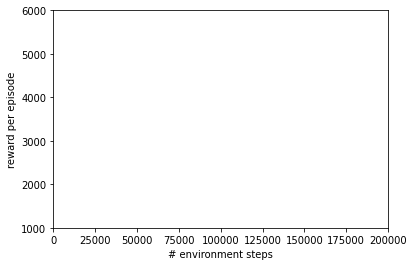

In [8]:
train_fn = functools.partial(
      ppo.train, num_timesteps = 200000, log_frequency = 1,
      reward_scaling = 0.8, episode_length = 1000, normalize_observations = True,
      action_repeat = 1, unroll_length = 10, num_minibatches = 32,
      num_update_epochs = 8, discounting = 0.97, learning_rate = 3e-4,
      entropy_cost = 1e-3, num_envs = 2048, batch_size = 1024, seed=1
  )

# train_fn = functools.partial(
#       ppo.train, num_timesteps = 5000,episode_length = 1000,  
#       normalize_observations = False, num_envs = 2048, batch_size = 1024,
#       num_minibatches = 32
#   )

min_y = 1000
max_y = 6000
xdata = []
ydata = []
times = [datetime.now()]

def progress(num_steps, metrics):
  times.append(datetime.now())
  xdata.append(num_steps)
  ydata.append(metrics['eval/episode_reward'])
  plt.xlim([0, train_fn.keywords['num_timesteps']])
  plt.ylim([min_y, max_y])
  plt.xlabel('# environment steps')
  plt.ylabel('reward per episode')
  # plt.plot(xdata, ydata)
  # plt.show()
  

inference_fn, params, _ = train_fn(environment_fn=env_fn, progress_fn=progress)

print(f'time to jit: {times[1] - times[0]}')
print(f'time to train: {times[-1] - times[1]}')

In [ ]:

from brax.io import model


model.save_params('/tmp/params', params)
empty_params, inference_fn = ppo.make_params_and_inference_fn(
    env.observation_size, env.action_size, True)
params = model.load_params('/tmp/params', empty_params)

In [9]:
jit_env_reset = jax.jit(env.reset)
jit_env_step = jax.jit(env.step)
jit_inference_fn = jax.jit(inference_fn)

rollout = []
rng = jax.random.PRNGKey(seed=0)
state = jit_env_reset(rng=rng)
while not state.done:
  rollout.append(state)
  act_rng, rng = jax.random.split(rng)
  act = jit_inference_fn(params, state.obs, act_rng)
  state = jit_env_step(state, act)
# print(rollout)
HTML(html.render(env.sys, [s.qp for s in rollout]))

In [ ]:
params

((array(0., dtype=float32),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [ ]:
rollout = []
for i in range(100):
  # wiggle sinusoidally
  action = jnp.ones((env.action_size,)) * jnp.sin(i * jnp.pi / 15)
  state = env.step(state, action)
  rollout.append(state)

In [ ]:
HTML(html.render(env.sys, [s.qp for s in rollout]))